# Assignment for DV2
---

### Import Libraries
---

In [1]:
from dash import Dash
from dash import html, dcc 
from dash import callback, Output, Input
import plotly.express as px
import pandas as pd
import numpy as np
from tqdm import tqdm
import requests
import zipfile
import io

In [2]:
def read_csv_from_zip_url(url):
    response = requests.get(url)
    with zipfile.ZipFile(io.BytesIO(response.content)) as zipf:
        # Assuming there's only one file in the zip
        csv_file_name = zipf.namelist()[0]
        with zipf.open(csv_file_name) as csv_file:
            return pd.read_csv(csv_file)


In [3]:
OK_Data = read_csv_from_zip_url('https://github.com/Iandrewburg/DV2_Assignment/blob/main/OK_Data.zip?raw=true')
AK_Data = read_csv_from_zip_url('https://github.com/Iandrewburg/DV2_Assignment/blob/main/AK_Data.zip?raw=true')

In [4]:
def process_data(data):
    # Ensure data is a DataFrame
    if not isinstance(data, pd.DataFrame):
        raise ValueError("Input must be a pandas DataFrame")

    df['OBSERVATION COUNT'] = pd.to_numeric(df['OBSERVATION COUNT'].str.replace('X', '0').str.strip())
    data.columns = data.columns.str.replace(' ', '_')
    data['OBSERVATION_DATE'] = pd.to_datetime(data['OBSERVATION_DATE'])
    data['YEAR'] = data['OBSERVATION_DATE'].dt.year
    data['MONTH'] = data['OBSERVATION_DATE'].dt.strftime('%B')
    data['year_month'] = data['OBSERVATION_DATE'].dt.strftime('%Y-%m')

    # Columns to drop
    columns_to_drop = ['LAST_EDITED_DATE', 'TAXONOMIC_ORDER', 'CATEGORY', 'TAXON_CONCEPT_ID',
                       'SUBSPECIES_COMMON_NAME', 'SUBSPECIES_SCIENTIFIC_NAME', 'EXOTIC_CODE',
                       'BREEDING_CODE', 'BREEDING_CATEGORY', 'BEHAVIOR_CODE', 'AGE/SEX', 'COUNTRY', 
                       'COUNTRY_CODE', 'STATE_CODE', 'COUNTY_CODE', 'IBA_CODE', 'BCR_CODE',
                       'ATLAS_BLOCK', 'LOCALITY', 'LOCALITY_ID', 'USFWS_CODE', 'LOCALITY_TYPE',
                       'SAMPLING_EVENT_IDENTIFIER', 'PROTOCOL_TYPE', 'PROTOCOL_CODE', 'PROJECT_CODE',
                       'EFFORT_AREA_HA', 'ALL_SPECIES_REPORTED', 'GROUP_IDENTIFIER', 'HAS_MEDIA', 
                       'APPROVED', 'REVIEWED', 'REASON', 'TRIP_COMMENTS', 'SPECIES_COMMENTS', 
                       'Unnamed:_49']

    data = data.drop(columns=columns_to_drop, errors='ignore')

    return data


In [5]:
OK_Data = process_data(OK_Data)
AK_Data = process_data(AK_Data)

In [10]:
AK_OK_Data= pd.concat([AK_Data, OK_Data], ignore_index=True)

In [11]:
AK_OK_Data.columns

Index(['GLOBAL_UNIQUE_IDENTIFIER', 'COMMON_NAME', 'SCIENTIFIC_NAME',
       'OBSERVATION_COUNT', 'STATE', 'COUNTY', 'LATITUDE', 'LONGITUDE',
       'OBSERVATION_DATE', 'TIME_OBSERVATIONS_STARTED', 'OBSERVER_ID',
       'DURATION_MINUTES', 'EFFORT_DISTANCE_KM', 'NUMBER_OBSERVERS', 'YEAR',
       'MONTH', 'year_month'],
      dtype='object')

In [12]:
themes = [
    {'label': 'Plotly', 'value': 'plotly'},
    {'label': 'Seaborn', 'value': 'seaborn'},
    {'label': 'Simple White', 'value': 'simple_white'},
    # Add more themes as required
]
labels_ = {'COMMON_NAME': 'Common Name', 'OBSERVATION_COUNT': 'Observation Count'}
chart_size = {'height' : 650, 'width' : 650}

In [14]:
# Group by 'COMMON_NAME' and sum 'OBSERVATION_COUNT'
grouped_df_OK = OK_Data.groupby('COMMON_NAME')['OBSERVATION_COUNT'].sum().reset_index()

# Sort by 'OBSERVATION_COUNT' in descending order and select the top 10
top10_birds_OK = grouped_df_OK.sort_values(by='OBSERVATION_COUNT', ascending=False).head(10)

# Display the top 10 birds
print(top10_birds_OK)

                 COMMON_NAME  OBSERVATION_COUNT
11           Franklin's Gull            1155543
15          Ring-billed Gull             968165
10         European Starling             653359
14      Red-winged Blackbird             648295
6               Canada Goose             446315
9   Double-crested Cormorant             381498
18      Western Cattle Egret             343722
16            Sandhill Crane             312382
3     American White Pelican             300400
12                   Mallard             259235


In [19]:
# Group by 'COMMON_NAME' and sum 'OBSERVATION_COUNT'
grouped_df_AK = AK_Data.groupby('COMMON_NAME')['OBSERVATION_COUNT'].sum().reset_index()

# Sort by 'OBSERVATION_COUNT' in descending order and select the top 10
top10_birds_AK = grouped_df_AK.sort_values(by='OBSERVATION_COUNT', ascending=False).head(10)

# Display the top 10 birds
print(top10_birds_AK)

                    COMMON_NAME  OBSERVATION_COUNT
17                   Snow Goose            2813045
15         Red-winged Blackbird            1108871
18                blackbird sp.             630777
5                Common Grackle             382790
7             European Starling             370904
9   Greater White-fronted Goose             345513
16             Ring-billed Gull             311547
4                  Canada Goose             277876
6      Double-crested Cormorant             248807
13            Northern Shoveler             237164


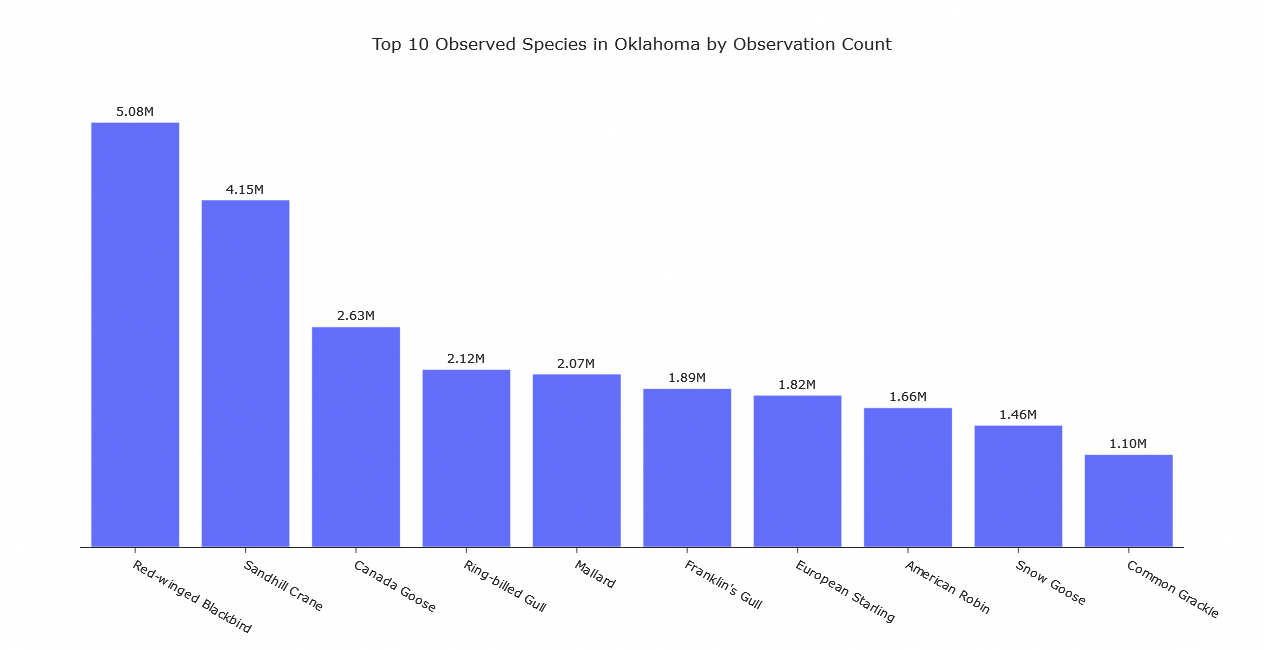

In [23]:
fig3 = px.bar(top10_birds_OK, x = 'COMMON_NAME', y = 'OBSERVATION_COUNT',
            title= 'Top 10 Observed Species in Oklahoma by Observation Count',
            labels = labels_,
            text_auto = True)
fig3.update_layout(title_x=0.5, plot_bgcolor = 'white')
fig3.update_layout(chart_size, xaxis_title = None, template = 'simple_white')
fig3.update_yaxes(visible = False)
fig3.update_traces(texttemplate = '%{value:.3s}', textposition = 'outside')
fig3

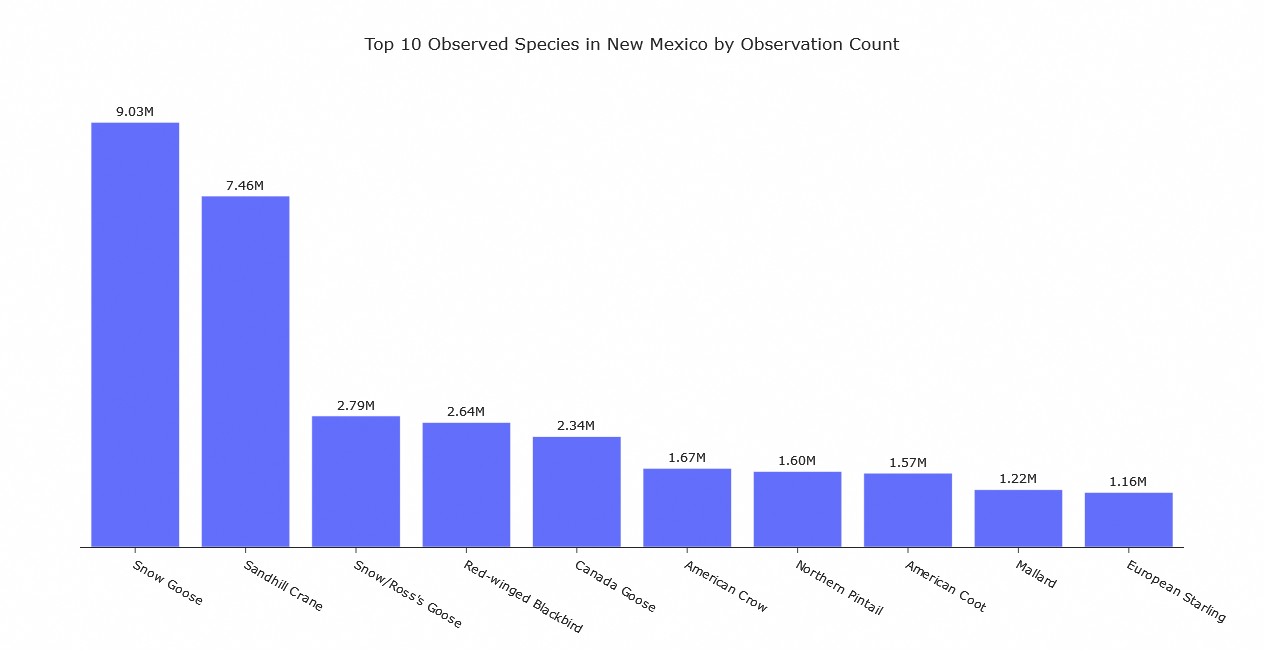

In [24]:
fig4 = px.bar(top10_birds_AK, x = 'COMMON_NAME', y = 'OBSERVATION_COUNT',
            title= 'Top 10 Observed Species in Arkansas by Observation Count',
            labels = labels_,
            text_auto = True)
fig4.update_layout(title_x=0.5, plot_bgcolor = 'white')
fig4.update_layout(chart_size, xaxis_title = None, template = 'simple_white')
fig4.update_yaxes(visible = False)
fig4.update_traces(texttemplate = '%{value:.3s}', textposition = 'outside')
fig4

In [32]:
import pandas as pd
import plotly.express as px

def plot_monthly_aggregated_bar_chart(dataframe, state):
    # Ensure the input is a DataFrame
    if not isinstance(dataframe, pd.DataFrame):
        raise ValueError("Input must be a pandas DataFrame")

    # Filter the DataFrame for the specified state
    state_data = dataframe[dataframe['STATE'] == state]

    # Ensure 'year_month' is in the correct datetime format for grouping
    state_data['year_month'] = pd.to_datetime(state_data['year_month'])

    # Identify the top observed bird species in the state
    top_bird = state_data.groupby('COMMON_NAME')['OBSERVATION_COUNT'].sum().idxmax()

    # Filter the DataFrame for only the top bird species in the state
    top_bird_data = state_data[state_data['COMMON_NAME'] == top_bird]

    # Aggregate the observation count by month
    monthly_aggregated_data = top_bird_data.groupby(top_bird_data['year_month'].dt.to_period('M'))['OBSERVATION_COUNT'].sum().reset_index()

    # Convert the period to datetime to be able to plot
    monthly_aggregated_data['year_month'] = monthly_aggregated_data['year_month'].dt.to_timestamp()

    # Plot the bar chart
    fig = px.bar(monthly_aggregated_data, x='year_month', y='OBSERVATION_COUNT',
                 title=f'Monthly Observation Count of {top_bird} in {state}',
                 labels={'year_month': 'Year-Month', 'OBSERVATION_COUNT': 'Observation Count'})
    fig.update_layout(plot_bgcolor='white', height=650, width=650, template='simple_white')
    fig.update_xaxes(title=None, tickformat='%Y-%m')
    fig.update_yaxes(title='Observation Count', visible=True)

    return fig



C:\Users\iandr\AppData\Local\Temp\ipykernel_18716\2362324698.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\iandr\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



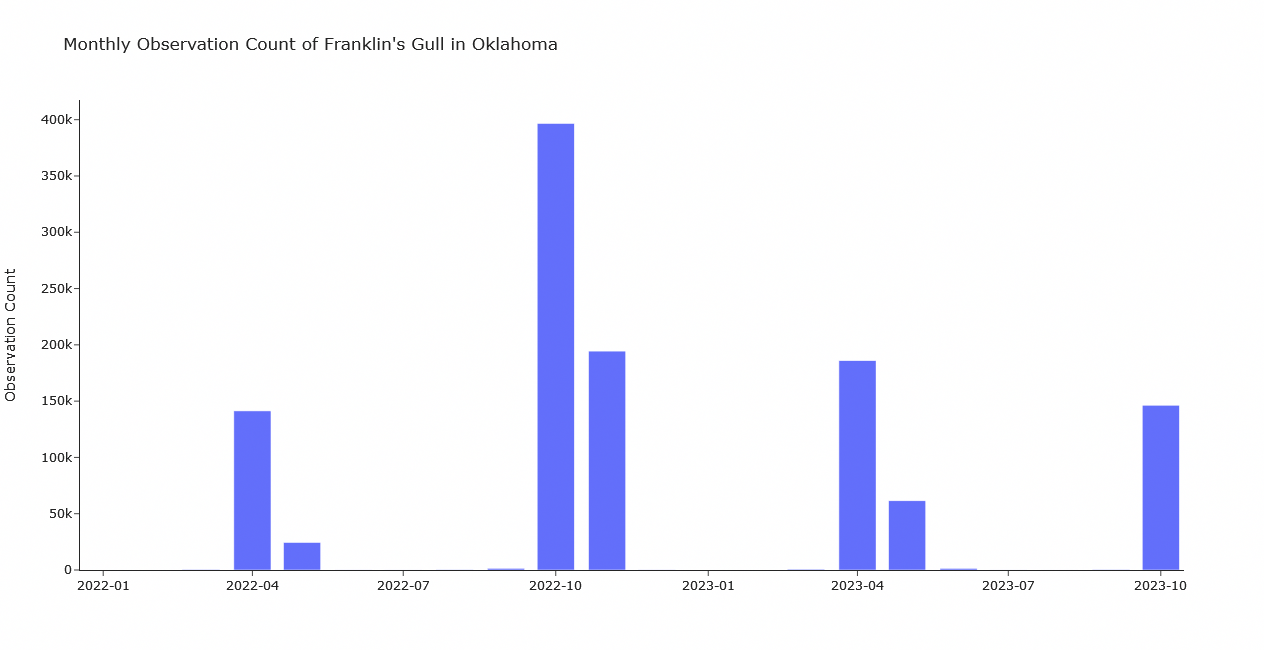

In [34]:
# Example usage
fig = plot_monthly_aggregated_bar_chart(AK_OK_Data, 'Oklahoma')
fig.show()


In [35]:
def plot_species_comparison_by_state(dataframe, bird_species):
    # Ensure the input is a DataFrame
    if not isinstance(dataframe, pd.DataFrame):
        raise ValueError("Input must be a pandas DataFrame")
    
    # Filter the DataFrame for the specified bird species
    species_data = dataframe[dataframe['COMMON_NAME'] == bird_species]

    # Ensure 'year_month' is in the correct datetime format for grouping
    species_data['year_month'] = pd.to_datetime(species_data['year_month'])

    # Aggregate the observation count by month and state
    monthly_state_aggregated_data = species_data.groupby([species_data['year_month'].dt.to_period('M'), 'STATE'])['OBSERVATION_COUNT'].sum().reset_index()

    # Convert the period to datetime to be able to plot
    monthly_state_aggregated_data['year_month'] = monthly_state_aggregated_data['year_month'].dt.to_timestamp()

    # Plot the bar chart
    fig = px.bar(monthly_state_aggregated_data, x='year_month', y='OBSERVATION_COUNT', color='STATE',
                 title=f'Monthly Observation Count Comparison of {bird_species} by State',
                 labels={'year_month': 'Year-Month', 'OBSERVATION_COUNT': 'Observation Count', 'STATE': 'State'})
    fig.update_layout(plot_bgcolor='white', height=650, width=650, template='simple_white')
    fig.update_xaxes(title=None, tickformat='%Y-%m')
    fig.update_yaxes(title='Observation Count', visible=True)

    return fig

# Example usage


C:\Users\iandr\AppData\Local\Temp\ipykernel_18716\3610834533.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\iandr\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



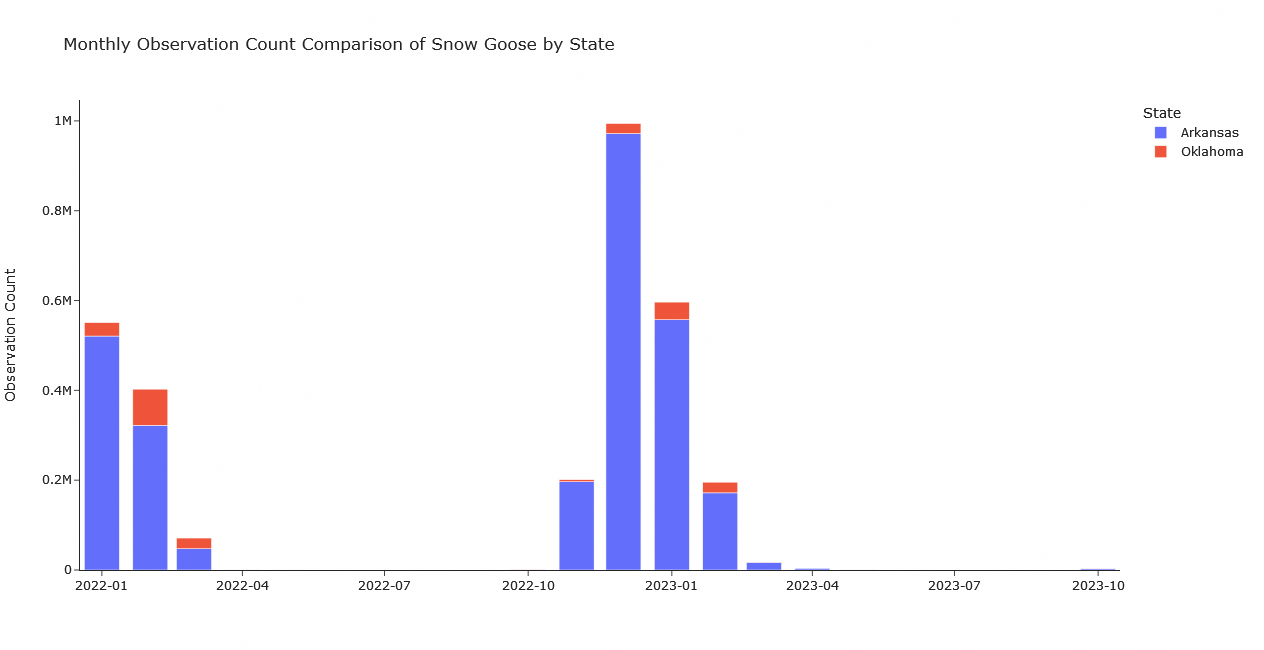

In [40]:
fig = plot_species_comparison_by_state(dataframe=AK_OK_Data, bird_species="Snow Goose")
fig.show()


In [16]:
app = Dash(__name__)

df = NM_OK_Data

# creating a variable for the list of countries

SPECIES = np.sort(df.COMMON_NAME.unique())
YEAR = [{'label': year, 'value': year} for year in df.YEAR.unique()]

app.layout = html.Div([
    html.H1(children='New Mexico and Oklahoma Observations', style={'textAlign':'center'}),
    
    # dropdown for theme selection
    html.Label('Select the theme of the chart:', style={'font-weight': 'bold', "text-align": "center"}),
    dcc.Dropdown(id = 'dropdown', options = themes, value = 'plotly'),
    
    # dropdown for species selection
    html.Label('Select the species to compare:', style={'font-weight': 'bold', "text-align": "center"}),
    dcc.Dropdown(id = 'dropdown2', options = SPECIES, value = 'Red-winged Blackbird', multi = True),
    
    # dropdown for year
    html.Label('Select the Year:', style={'font-weight': 'bold', "text-align": "center"}),
    dcc.Dropdown(id = 'dropdown3', options = YEAR, value = '2016', multi = True),
    
    # adding the label and the slider for changing the width
    html.Label('Select the width of the chart:', style={'font-weight': 'bold', "text-align": "center"}),
    dcc.Slider(700, 900, 100, value = 800, id = 'slider'),
    
    # adding the graphs
    html.Div(dcc.Graph(id = 'graph'), style = {'display': 'inline-block', 'width': '50%'}),
    html.Div(dcc.Graph(id = 'graph2'), style = {'display': 'inline-block', 'width': '50%'}),
    html.Div(dcc.Graph(id = 'graph3'), style = {'display': 'inline-block', 'width': '50%'}),
    html.Div(dcc.Graph(id = 'graph4'), style = {'display': 'inline-block', 'width': '50%'})
])

# a second input comes to the callback
@app.callback(
    Output('graph', 'figure'), 
    # extending the callback with the second chart
    Output('graph2', 'figure'),
    Output('graph3', 'figure'),
    Output('graph4', 'figure'),
    Input('dropdown', 'value'),
    Input('dropdown2', 'value'),
    Input('dropdown3', 'value'),
    Input('slider', 'value'))

def update_chart(template_name, SPECIES_list, YEAR_list, width_):
    # we can reference our variables using @
    df = NM_OK_Data.query("COMMON_NAME in @SPECIES_list and YEAR in @YEAR_list")

   
    fig3 = px.bar(top10_birds_OK, x = 'COMMON_NAME', y = 'OBSERVATION_COUNT',
            title= 'Top 10 Observed Species in Oklahoma by Observation Count',
            labels = labels_,
            text_auto = True)
    fig3.update_layout(title_x=0.5, plot_bgcolor = 'white')
    fig3.update_layout(chart_size, xaxis_title = None, template = 'simple_white')
    fig3.update_yaxes(visible = False)
    fig3.update_traces(texttemplate = '%{value:.3s}', textposition = 'outside')
    
    fig4 = px.bar(top10_birds_NM, x = 'COMMON_NAME', y = 'OBSERVATION_COUNT',
            title= 'Top 10 Observed Species in New Mexico by Observation Count',
            labels = labels_,
            text_auto = True)
    fig4.update_layout(title_x=0.5, plot_bgcolor = 'white')
    fig4.update_layout(chart_size, xaxis_title = None, template = 'simple_white')
    fig4.update_yaxes(visible = False)
    fig4.update_traces(texttemplate = '%{value:.3s}', textposition = 'outside')
    
    fig = px.bar(df, x='year_month', y='OBSERVATION_COUNT',
                 title='Observation Count of ' + ''.join(SPECIES_list) + ' by State in ' + ''.join(map(str, YEAR_list)),
                 color='STATE', barmode='group')
    fig.update_layout(title_x=0.5, title_font_size = 15)
     
    
    fig2 = px.line(df, x='year_month', y='OBSERVATION_COUNT', color='STATE',
                   title='Observations by County ' + ''.join(SPECIES_list),
                   template=template_name, width=width_)
    fig2.update_layout(title_x=0.5, title_font_size=15)
    # returning 2 charts this time
    
    return fig3, fig4, fig, fig2

if __name__ == '__main__':
    app.run(debug=True)